In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from scipy import stats

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score # Performance measure – Accuracy

from sklearn import preprocessing

In [9]:
df = pd.read_excel("C:\\Users\\Windows\\Desktop\\Capstone Project\\Bank_Personal_Loan_Modelling.xlsx")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [10]:
personal_loan = df['Personal Loan']
df.drop(['Personal Loan'], axis=1, inplace = True)
df['Personal Loan'] = personal_loan
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [11]:

rows_count, columns_count = df.shape
print("total Number of rows :", rows_count)
print("total Number of columns :", columns_count)

total Number of rows : 5000
total Number of columns : 14


In [12]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [13]:
df.info

<bound method DataFrame.info of         ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Securities Account  CD Account  Online  CreditCard 

In [14]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [15]:
df.isnull().values.any()

False

<Axes: >

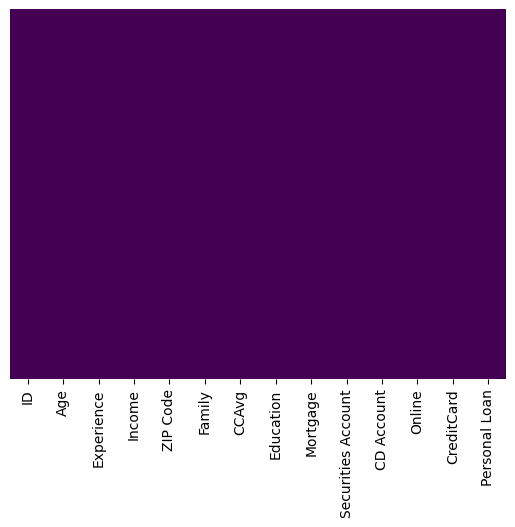

In [18]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [21]:
df_transpose = df.describe().T
df_transpose[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


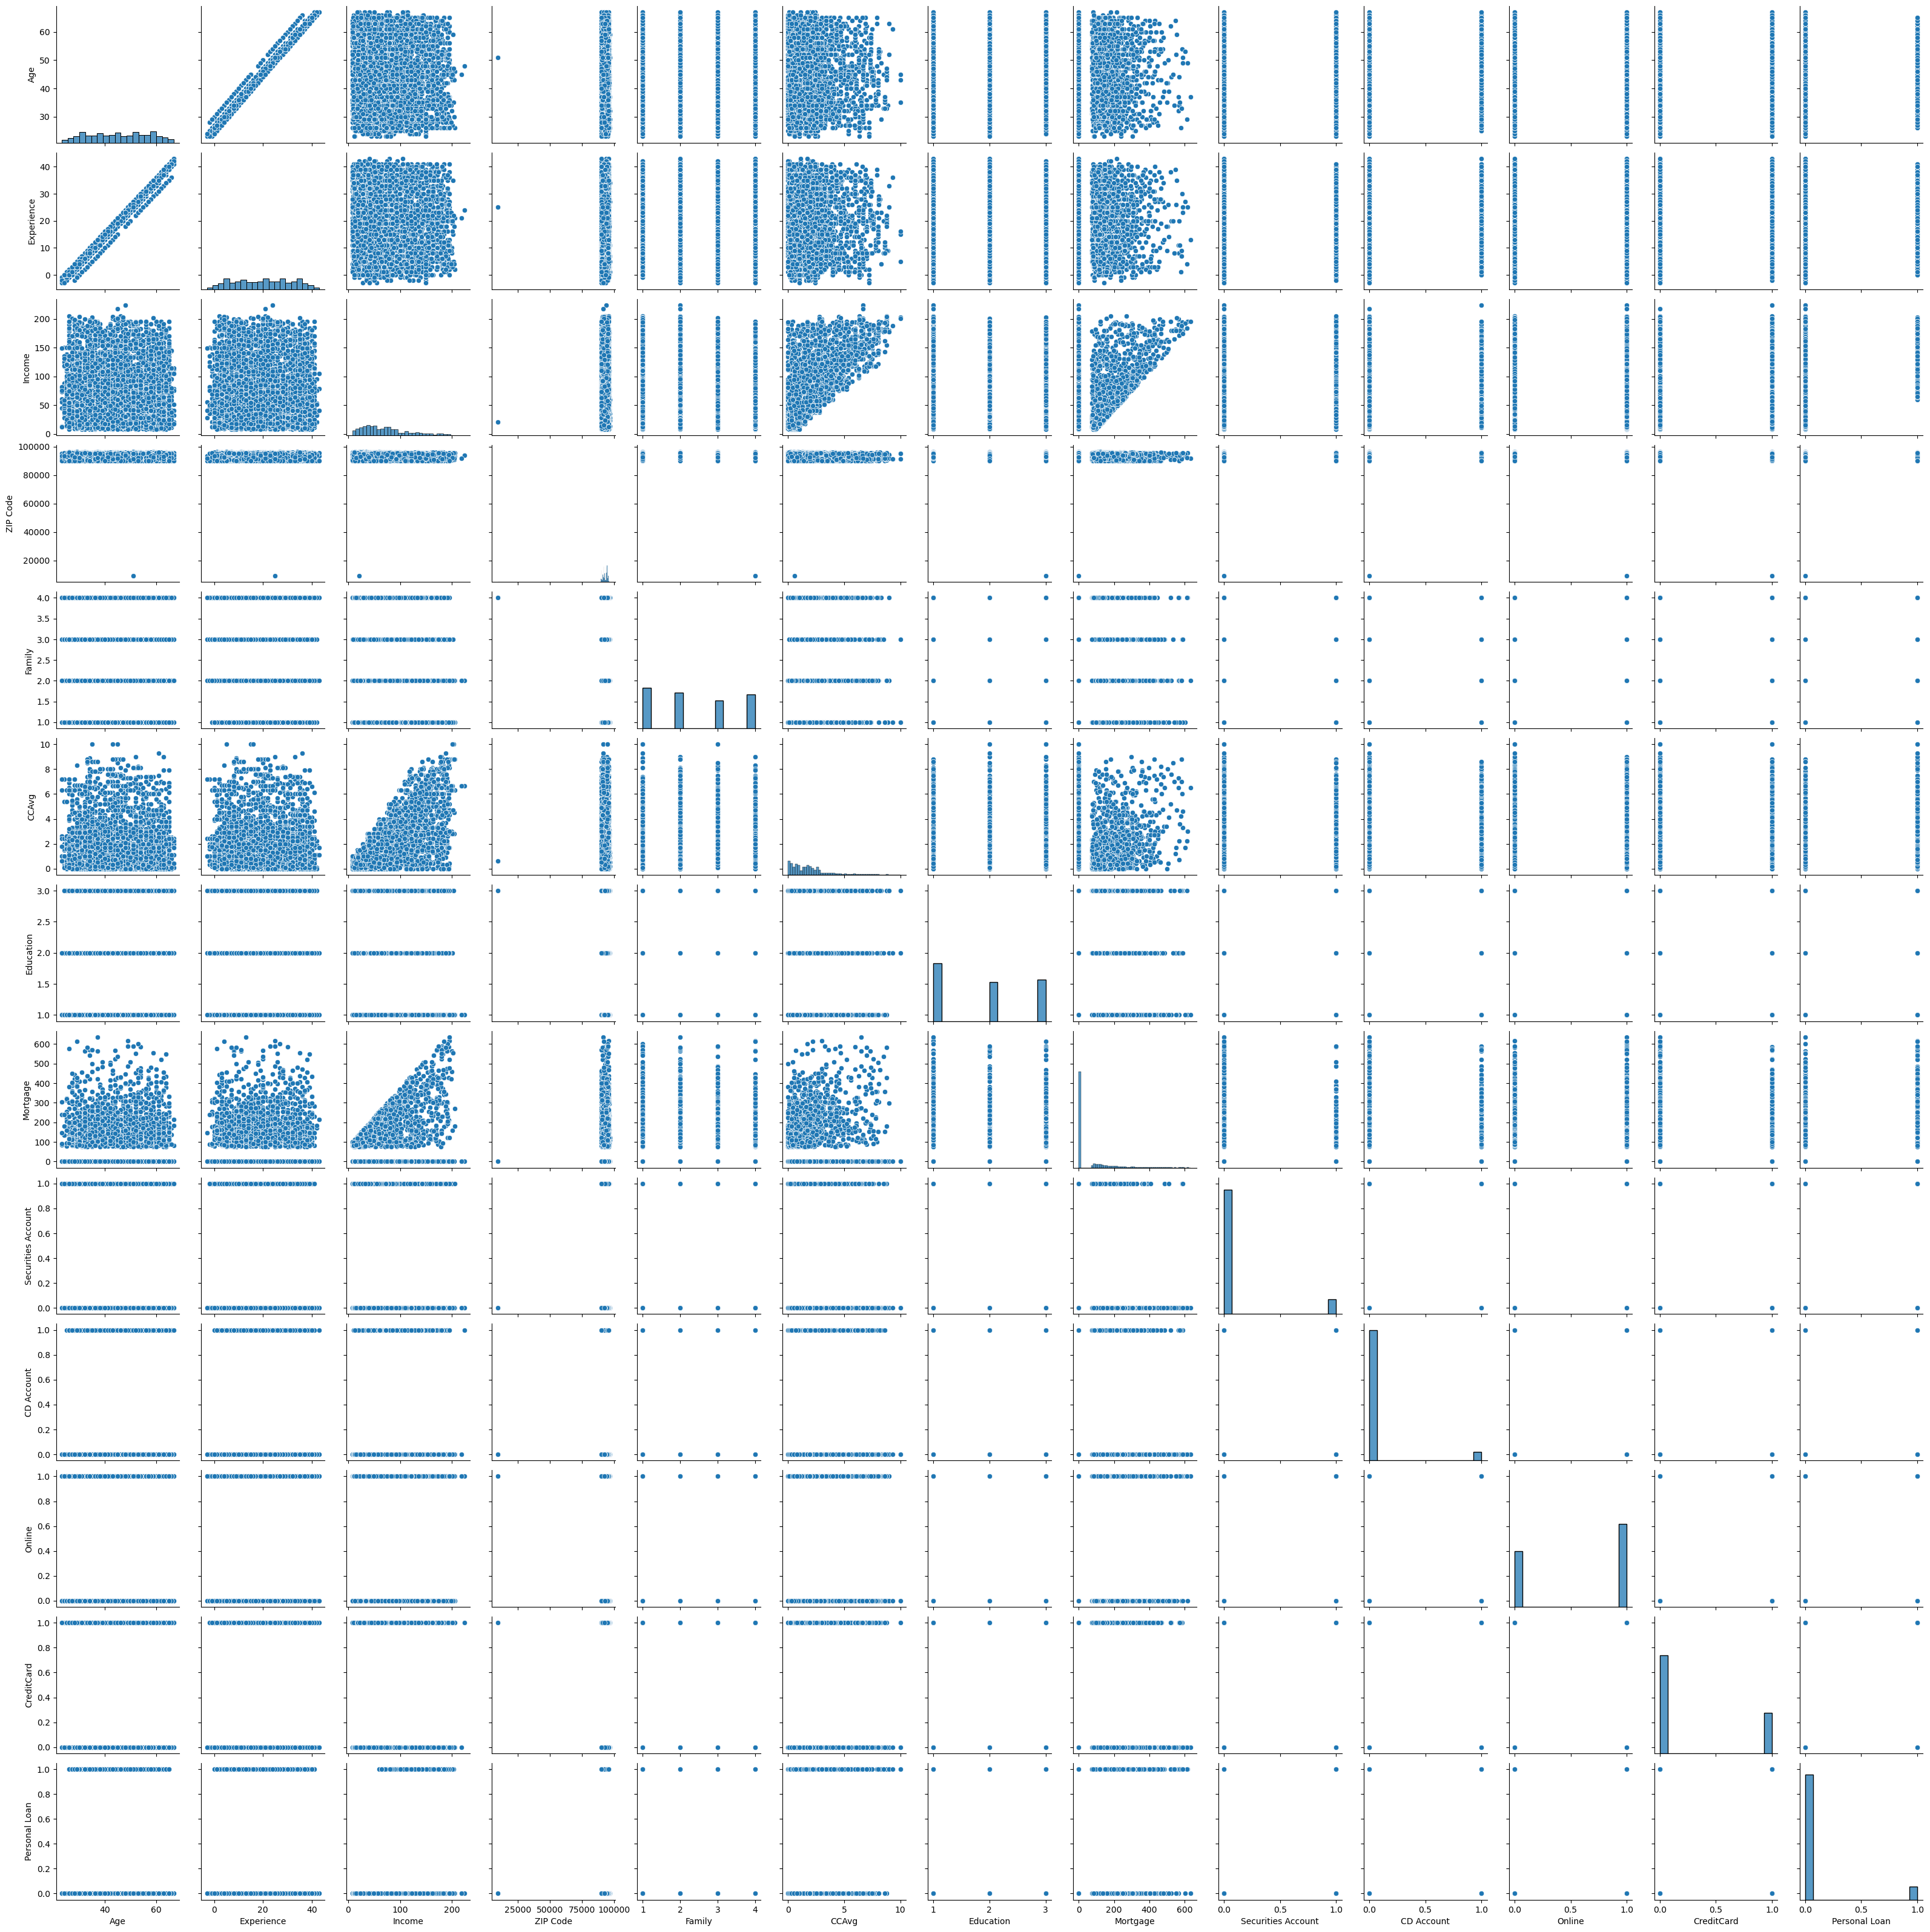

In [22]:
sns.pairplot(df.iloc[:,1:])

In [23]:
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

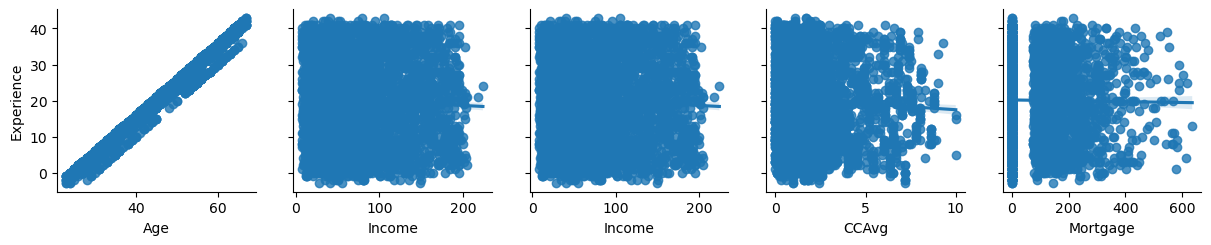

In [25]:
quantitiveVar = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
expGrid = sns.PairGrid(df, y_vars = 'Experience', x_vars = quantitiveVar)
expGrid.map(sns.regplot)

In [26]:
df_Possitive_Experience = df[df['Experience'] > 0]
df_Negative_Experience =  df[df['Experience'] < 0]
df_Negative_Experience_List = df_Negative_Experience['ID'].tolist()

for id in df_Negative_Experience_List:
    age_values = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education_values = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    possitive_Experience_Filtered = df_Possitive_Experience[(df_Possitive_Experience['Age'] == age_values) & (df_Possitive_Experience['Education'] == education_values)]
    if possitive_Experience_Filtered.empty :
        negative_Experience_Filtered = df_Negative_Experience[(df_Negative_Experience['Age'] == age_values) & (df_Negative_Experience['Education'] == education_values)]
        exp = round(negative_Experience_Filtered['Experience'].median())
    else:
        exp = round(possitive_Experience_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)

In [27]:
df[df['Experience'] < 0]['Experience'].count()

0

In [28]:
df.Experience.describe()

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\836994825.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ID'])


<Axes: xlabel='ID', ylabel='Density'>

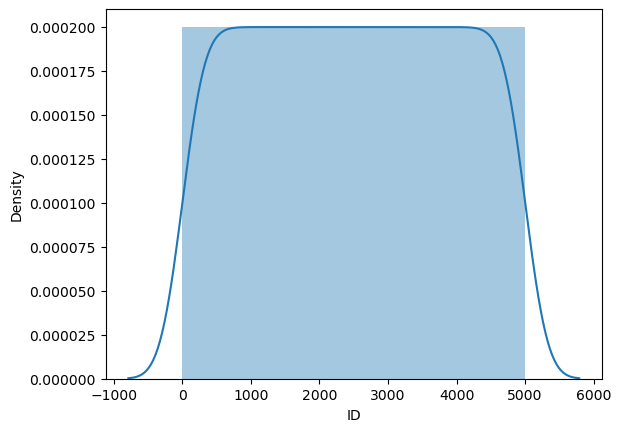

In [29]:
sns.distplot(df['ID'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

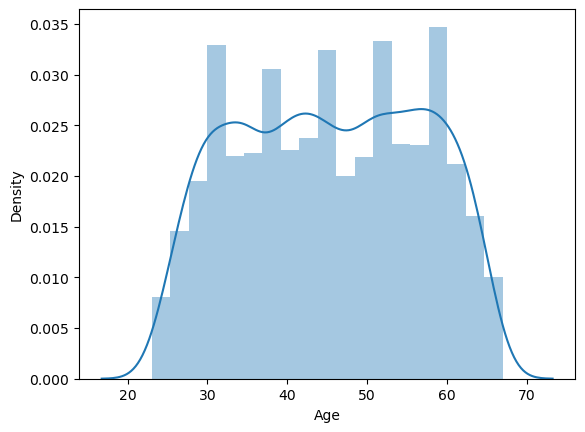

In [30]:
sns.distplot(df['Age'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\4088753809.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'])


<Axes: xlabel='Experience', ylabel='Density'>

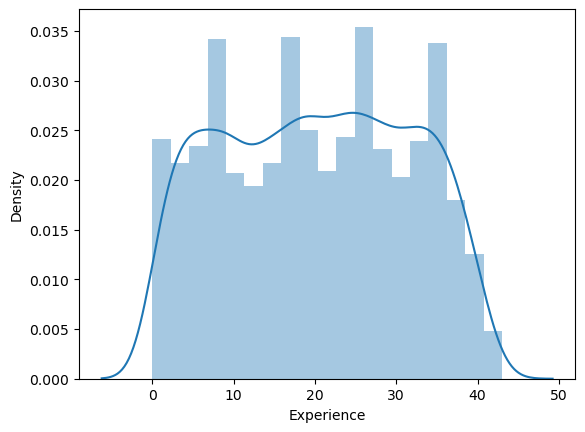

In [31]:
sns.distplot(df['Experience'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\1426022472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


<Axes: xlabel='Income', ylabel='Density'>

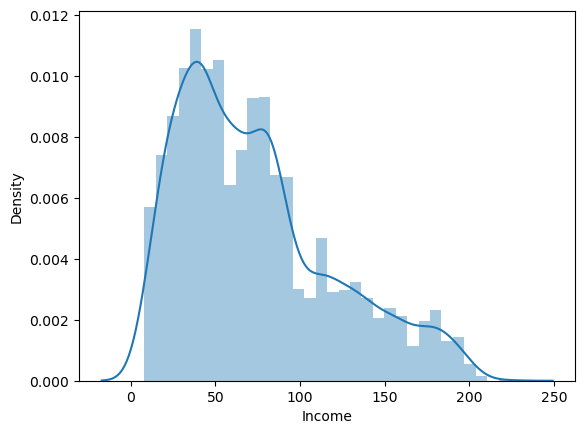

In [32]:
sns.distplot(df['Income'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\2154530192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ZIP Code'])


<Axes: xlabel='ZIP Code', ylabel='Density'>

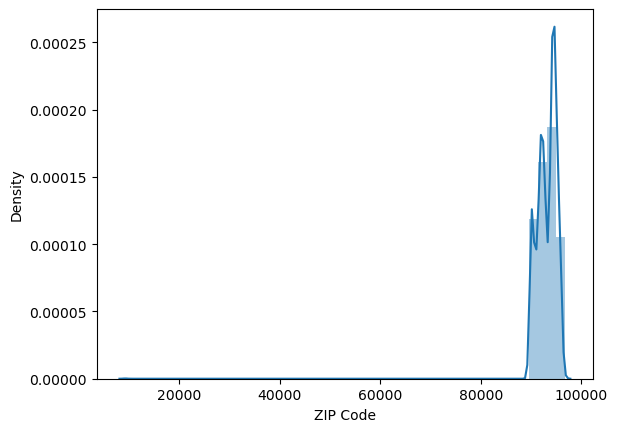

In [33]:
sns.distplot(df['ZIP Code'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\2020064862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CCAvg'])


<Axes: xlabel='CCAvg', ylabel='Density'>

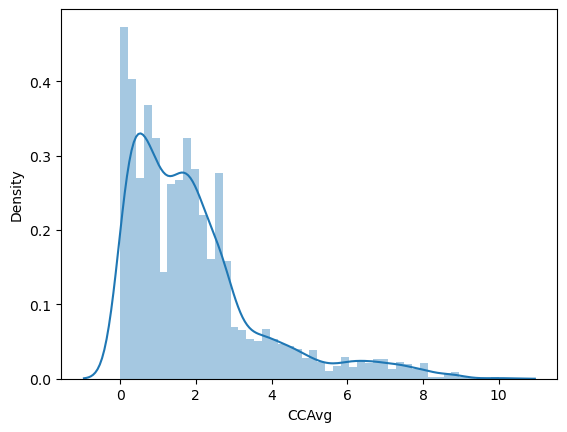

In [34]:
sns.distplot(df['CCAvg'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\4185952261.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Education'])


<Axes: xlabel='Education', ylabel='Density'>

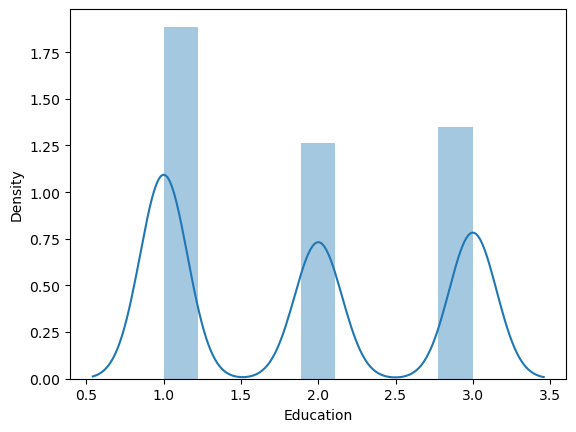

In [35]:
sns.distplot(df['Education'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\3601921439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mortgage'])


<Axes: xlabel='Mortgage', ylabel='Density'>

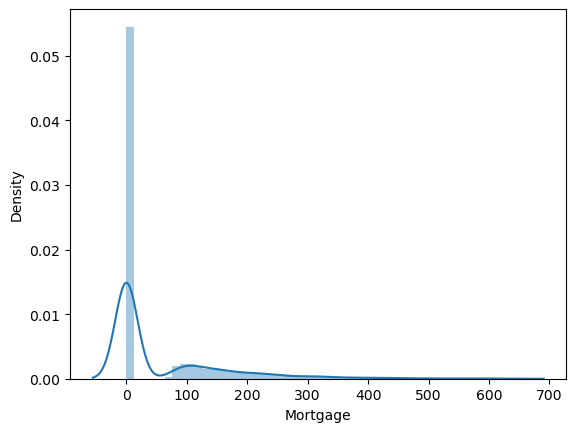

In [36]:
sns.distplot(df['Mortgage'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\1537385328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Online'])


<Axes: xlabel='Online', ylabel='Density'>

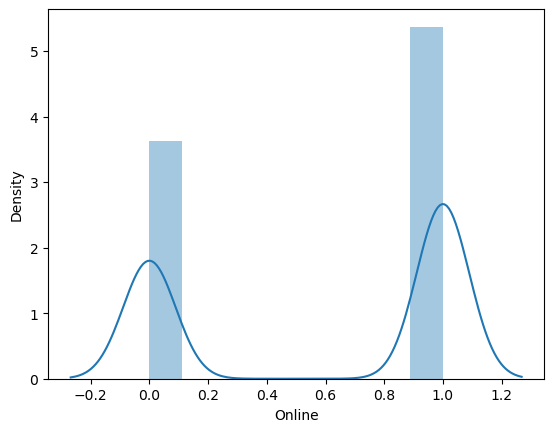

In [37]:
sns.distplot(df['Online'])

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\1009985999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CreditCard'])


<Axes: xlabel='CreditCard', ylabel='Density'>

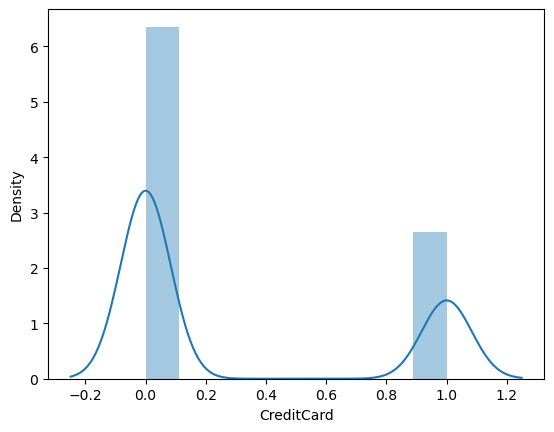

In [38]:
sns.distplot(df['CreditCard'])

In [39]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


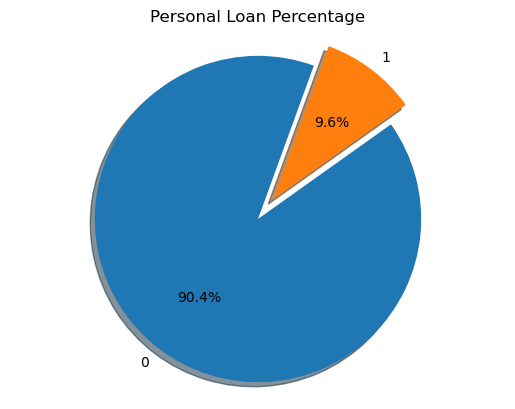

In [40]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure la

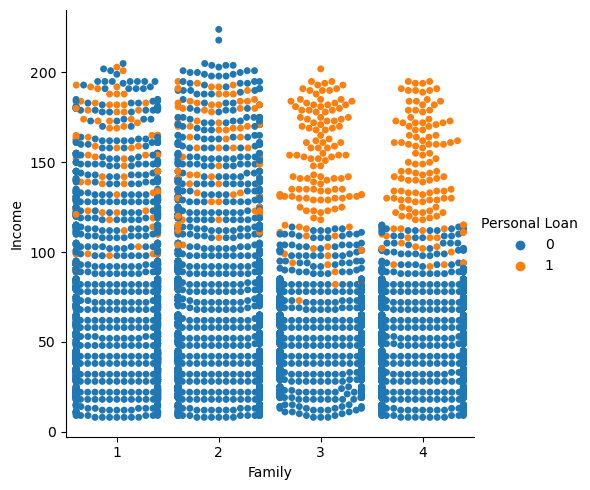

In [41]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

<Axes: xlabel='Education', ylabel='Income'>

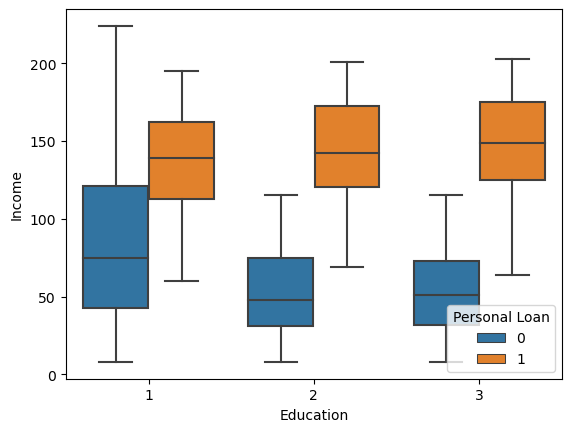

In [42]:
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data = df)

<Axes: xlabel='Education', ylabel='Mortgage'>

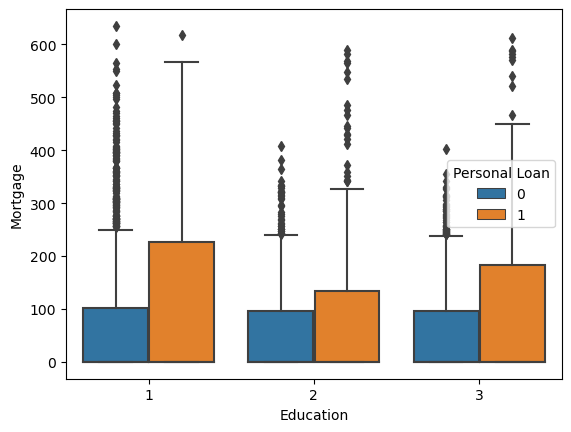

In [43]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

<Axes: xlabel='Securities Account', ylabel='count'>

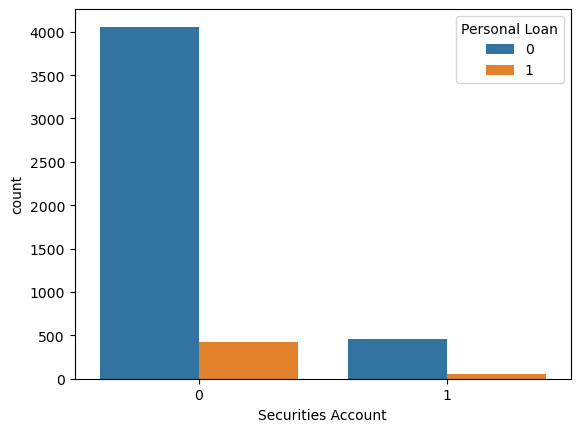

In [44]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

<Axes: xlabel='Family', ylabel='count'>

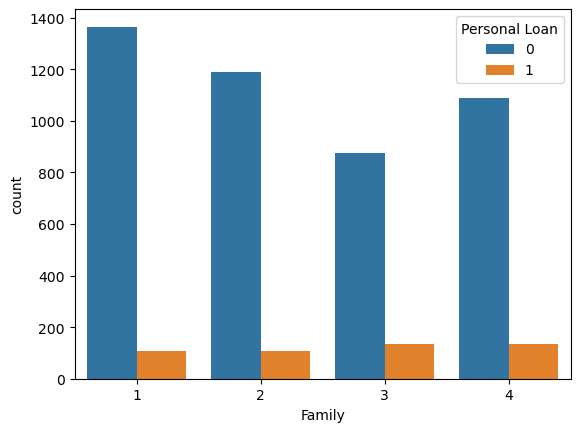

In [45]:
sns.countplot(x='Family',data=df,hue='Personal Loan')

<Axes: xlabel='CD Account', ylabel='count'>

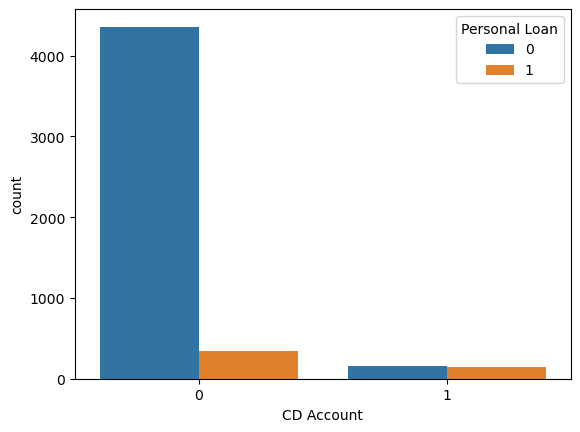

In [46]:
sns.countplot(x='CD Account',data=df,hue='Personal Loan')

<Axes: xlabel='CreditCard', ylabel='CCAvg'>

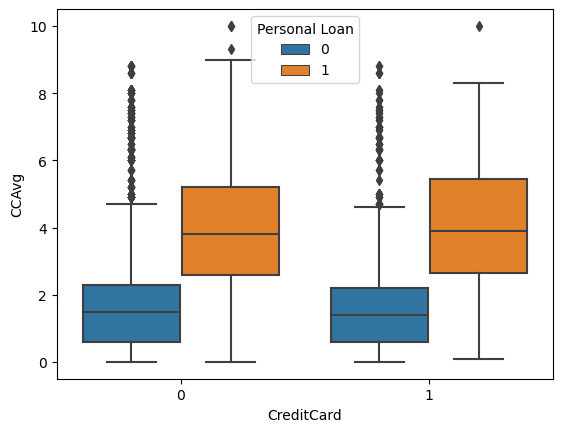

In [47]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=df)

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


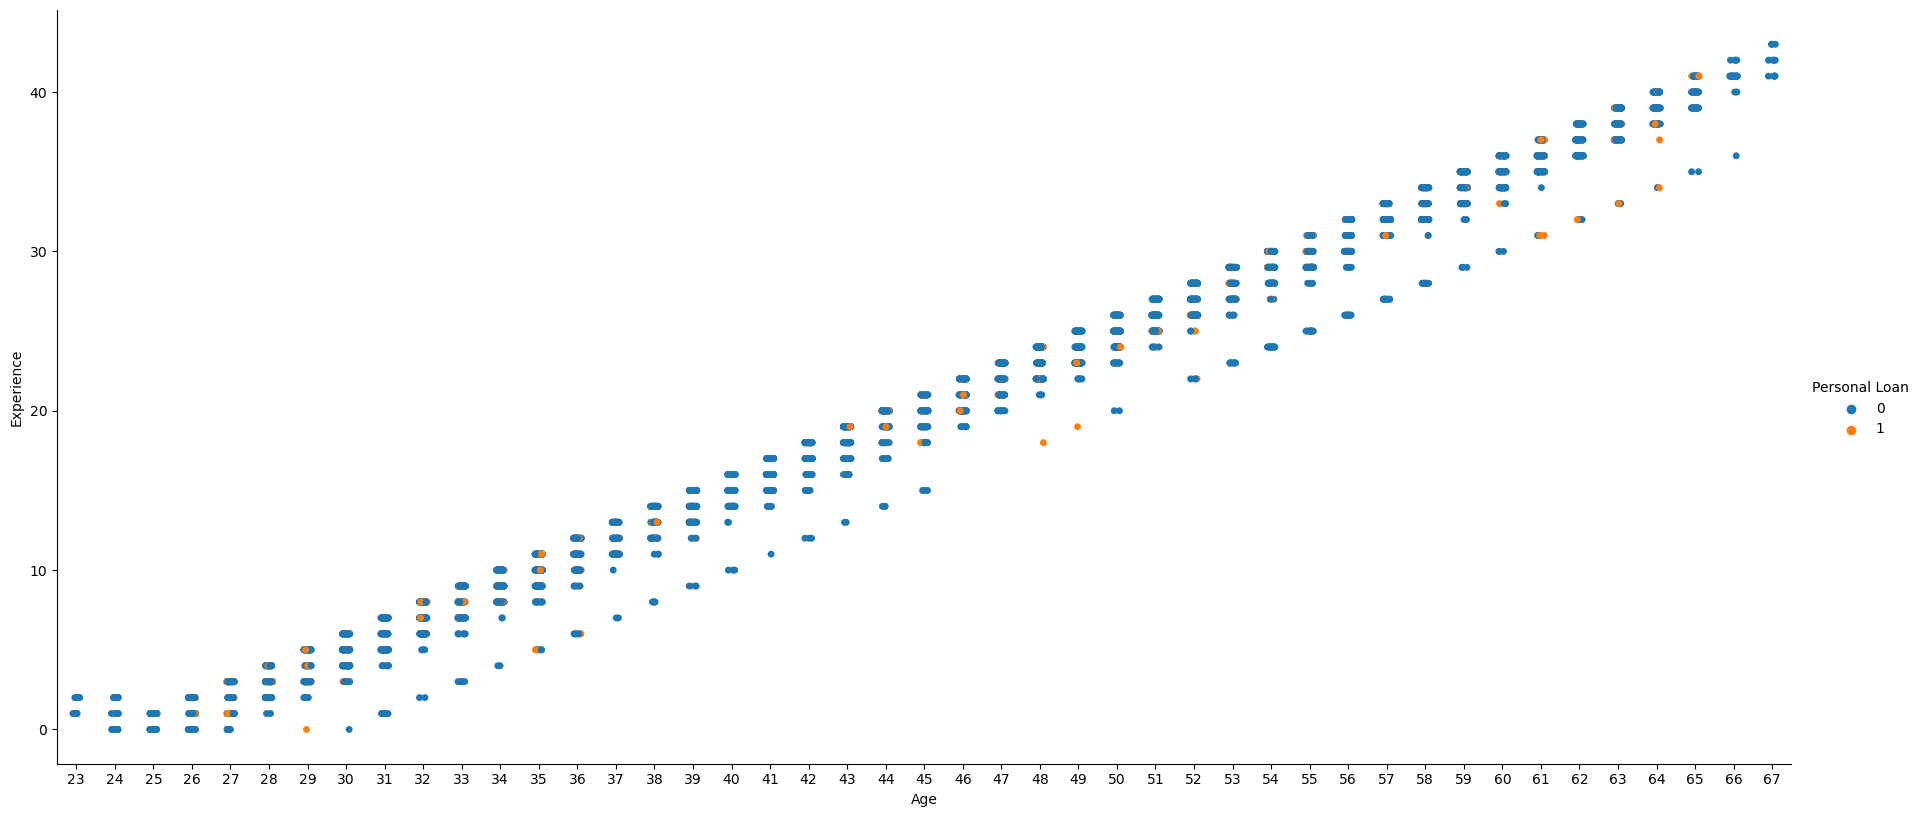

In [48]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = df, height=8.27, aspect=11/5)

C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\3644926731.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\3644926731.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0.5, 1.0, 'CCAvg Distribution')

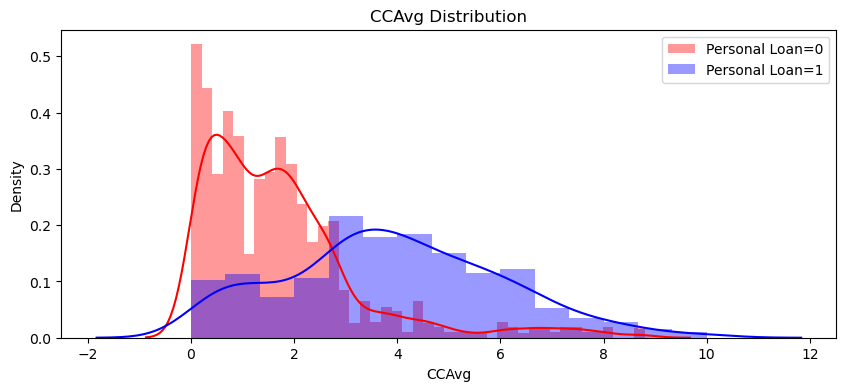

In [49]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['CCAvg'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

In [50]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\4203036962.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
C:\Users\Windows\AppData\Local\Temp\ipykernel_7600\4203036962.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

Text(0.5, 1.0, 'Income Distribution')

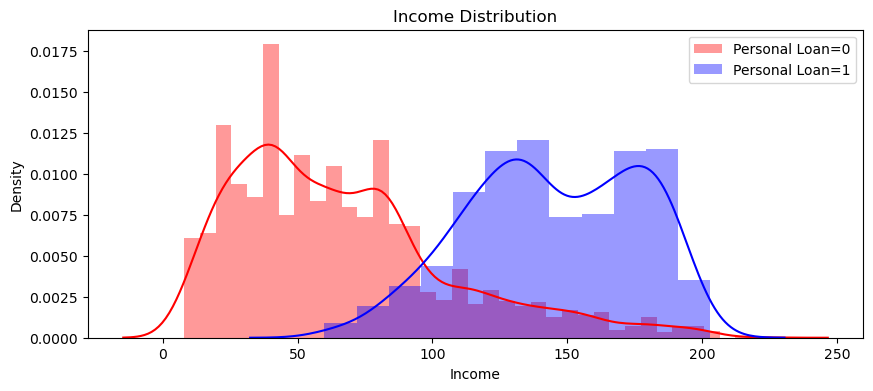

In [51]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

<Axes: >

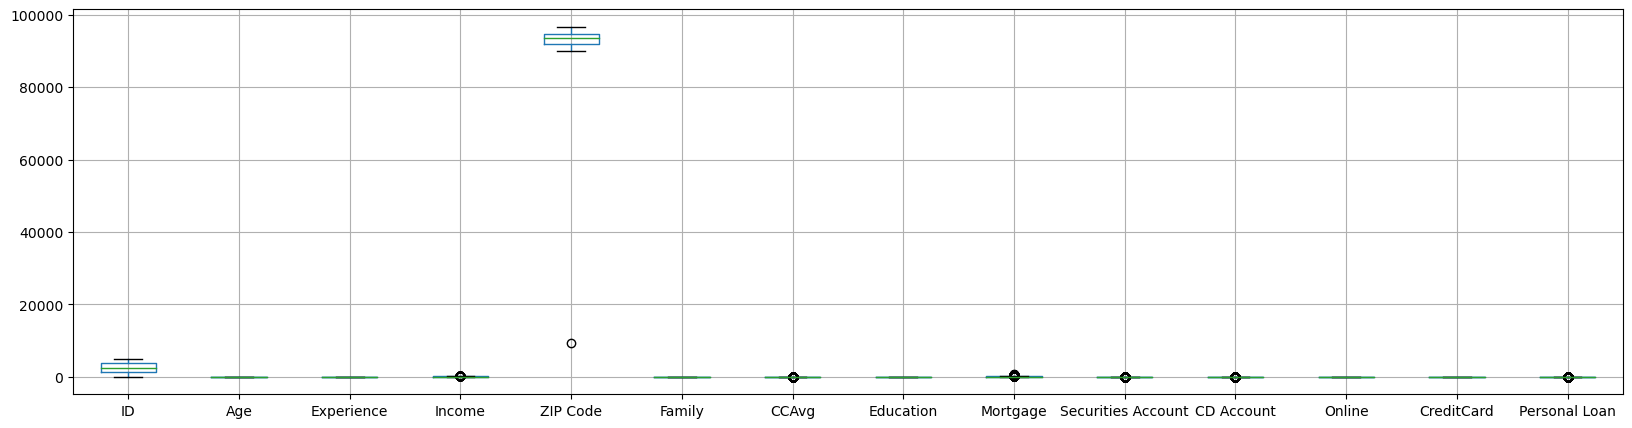

In [52]:
df.boxplot(return_type='axes', figsize=(20,5))

<Axes: title={'center': 'Correlation of Attributes'}>

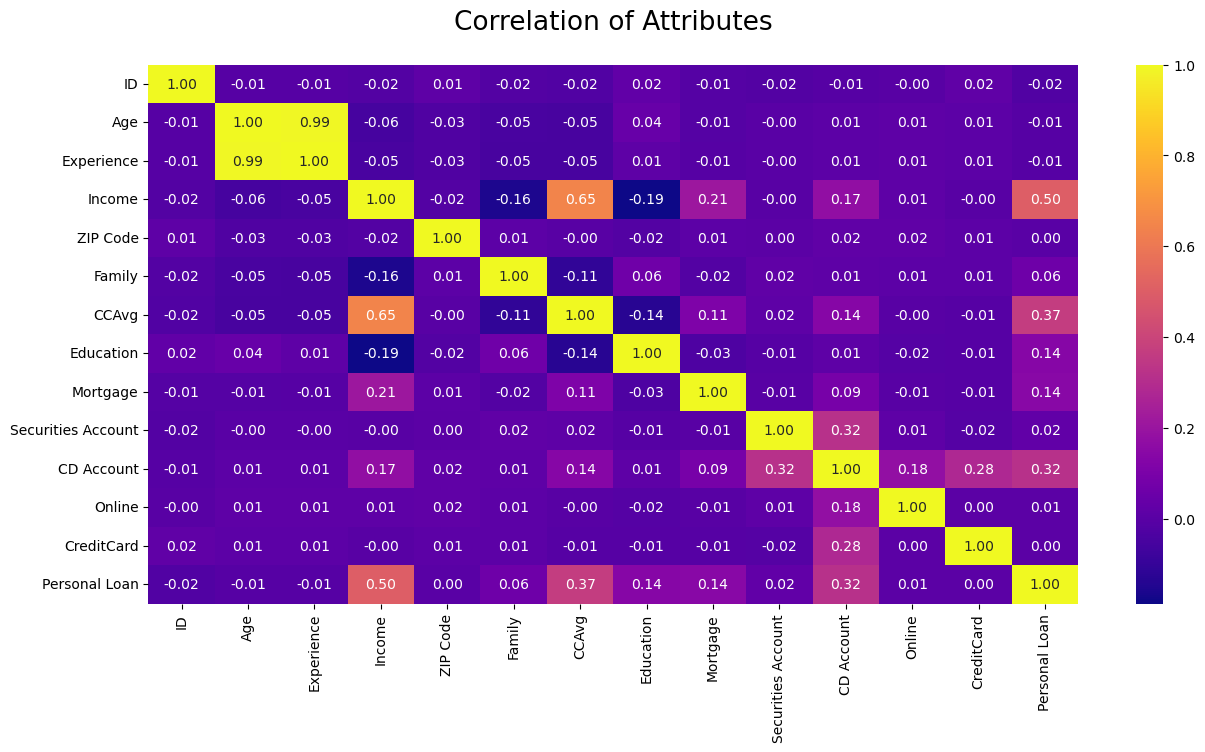

In [53]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

In [54]:
df.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


In [55]:
df = df.drop(['ID','ZIP Code'], axis=1)

In [56]:
df.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0


In [57]:
loan_with_experience = df
loan_without_experience = df.drop(['Experience'], axis=1)

In [58]:
print('Columns With Experience : ', loan_with_experience.columns)
print('Columns Without Experience : ', loan_without_experience.columns)

Columns With Experience :  Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')
Columns Without Experience :  Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan'],
      dtype='object')


In [59]:
X_Expr = loan_with_experience.drop('Personal Loan', axis=1)
Y_Expr = loan_with_experience[['Personal Loan']]

In [60]:
X_Without_Expr = loan_without_experience.drop('Personal Loan', axis=1)
Y_Without_Expr = loan_without_experience[['Personal Loan']]

In [61]:
X_Expr_train, X_Expr_test, y_Expr_train, y_Expr_test = train_test_split(X_Expr, Y_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_Expr_train.shape))
print('y train data {}'.format(y_Expr_train.shape))
print('x test data  {}'.format(X_Expr_test.shape))
print('y test data  {}'.format(y_Expr_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_Without_Expr, Y_Without_Expr, test_size=0.30, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 10)
y train data (3500, 1)
x test data  (1500, 10)
y test data  (1500, 1)


In [63]:
logreg_expr_model = LogisticRegression()
logreg_expr_model.fit(X_Expr_train, y_Expr_train)
print(logreg_expr_model , '\n')

# Predicting for test set
logreg_expr_y_predicted = logreg_expr_model.predict(X_Expr_test)
logreg_expr_score = logreg_expr_model.score(X_Expr_test, y_Expr_test)
logreg_expr_accuracy = accuracy_score(y_Expr_test, logreg_expr_y_predicted)

logestic_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, logreg_expr_y_predicted)

LogisticRegression() 



C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicting for test set
logreg_y_predicted = logreg_model.predict(X_test)
logreg_score = logreg_model.score(X_test, y_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_predicted)
logestic_confusion_matrix = metrics.confusion_matrix(y_test, logreg_y_predicted)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
print('Logistic Regression Model Accuracy Score W/O Experience  : %f'  % logreg_accuracy)
print('Logistic Regression Model Accuracy Score With Experience : %f'  % logreg_expr_accuracy)

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix W/O Experience: \n', logestic_confusion_matrix)
print('\nTrue Possitive    = ', logestic_confusion_matrix[1][1])
print('True Negative     = ',   logestic_confusion_matrix[0][0])
print('False Possive     = ',   logestic_confusion_matrix[0][1])
print('False Negative    = ',   logestic_confusion_matrix[1][0])
print('\nLogistic Regression Confusion Matrix With Experience: \n', logestic_confusion_matrix_expr)
print('\nTrue Possitive    = ', logestic_confusion_matrix_expr[1][1])
print('True Negative     = ',   logestic_confusion_matrix_expr[0][0])
print('False Possive     = ',   logestic_confusion_matrix_expr[0][1])
print('False Negative    = ',   logestic_confusion_matrix_expr[1][0])

Logistic Regression Model Accuracy Score W/O Experience  : 0.931333
Logistic Regression Model Accuracy Score With Experience : 0.946000

Logistic Regression Confusion Matrix W/O Experience: 
 [[1326   25]
 [  78   71]]

True Possitive    =  71
True Negative     =  1326
False Possive     =  25
False Negative    =  78

Logistic Regression Confusion Matrix With Experience: 
 [[1334   17]
 [  64   85]]

True Possitive    =  85
True Negative     =  1334
False Possive     =  17
False Negative    =  64


In [66]:
X_train_scaled = preprocessing.scale(X_Expr_train)
X_test_scaled = preprocessing.scale(X_Expr_test)

In [67]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(X_train_scaled, y_Expr_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(X_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(X_test_scaled, y_Expr_test)
scaled_logreg_accuracy = accuracy_score(y_Expr_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_Expr_test, scaled_logreg_y_predicted)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
print('*FINAL ANALYSIS OF LOGISTIC REGRESSION*\n')
print('After Scalling Logistic Regression Model Accuracy Score with Experience: %f'  % scaled_logreg_accuracy)
print('\nAfter Scalling Logistic Regression Confusion Matrix With Experience: \n', scaled_logreg_confusion_matrix)
print('\nTrue Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_Expr_test, scaled_logreg_y_predicted))
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

*FINAL ANALYSIS OF LOGISTIC REGRESSION*

After Scalling Logistic Regression Model Accuracy Score with Experience: 0.947333

After Scalling Logistic Regression Confusion Matrix With Experience: 
 [[1333   18]
 [  61   88]]

True Possitive    =  88
True Negative     =  1333
False Possive     =  18
False Negative    =  61

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Accuracy of accepting Loan  :  0.95
precision of accepting Loan :  0.83
recall of accepting Loan    :  0.59
F1 score of accepting Loan  :  0.69


Odd Neighbors : 
 [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

Accuracy Score : 
 [0.9086666666666666, 0.9093333333333333, 0.906, 0.9026666666666666, 0.9053333333333333, 0.908, 0.908, 0.9066666666666666, 0.9073333333333333, 0.904]

Misclassification error :
 [0.09133333333333338, 0.09066666666666667, 0.09399999999999997, 0.09733333333333338, 0.09466666666666668, 0.09199999999999997, 0.09199999999999997, 0.09333333333333338, 0.09266666666666667, 0.09599999999999997]

The optimal number of neighbor is k= 3


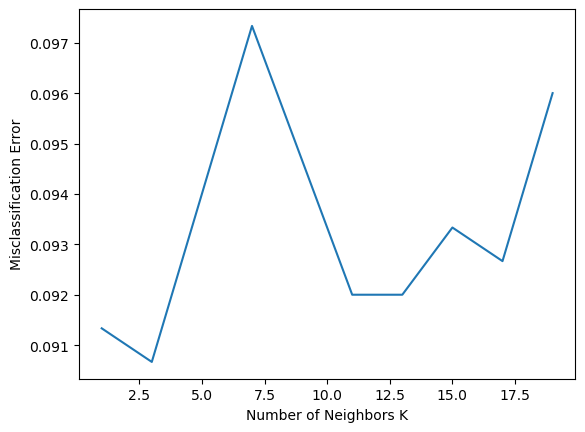

In [71]:
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declearing a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(X_train, y_train.values.ravel())               
    y_pred = knn.predict(X_test)
    #evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores] # changing to misclassification error


# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [81]:
#KNN MODEL




knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_y_predicted = knn_model.predict(X_test)
knn_score = knn_model.score(X_test, y_test)
knn_accuracy = accuracy_score(y_test, knn_y_predicted)
knn_confusion_matrix = metrics.confusion_matrix(y_test, knn_y_predicted)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [82]:
knn_model_expr = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model_expr.fit(X_Expr_train, y_Expr_train)
knn_expr_y_predicted = knn_model_expr.predict(X_Expr_test)
knn_expr_score = knn_model_expr.score(X_Expr_test, y_Expr_test)
knn_expr_accuracy = accuracy_score(y_Expr_test, knn_expr_y_predicted)
knn_confusion_matrix_expr = metrics.confusion_matrix(y_Expr_test, knn_expr_y_predicted)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [83]:
print('K-NN Model Accuracy Score W/O Experience  : %f'  % knn_accuracy)
print('K-NN Model Accuracy Score With Experience : %f'  % knn_expr_accuracy)

# Confusion Matrix
print('\nK-NN Confusion Matrix W/O Experience: \n', knn_confusion_matrix)
print('\nTrue Possitive    = ', knn_confusion_matrix[1][1])
print('True Negative     = ',   knn_confusion_matrix[0][0])
print('False Possive     = ',   knn_confusion_matrix[0][1])
print('False Negative    = ',   knn_confusion_matrix[1][0])
print('\nK-NN Confusion Matrix With Experience: \n', knn_confusion_matrix_expr)
print('\nTrue Possitive    = ', knn_confusion_matrix_expr[1][1])
print('True Negative     = ',   knn_confusion_matrix_expr[0][0])
print('False Possive     = ',   knn_confusion_matrix_expr[0][1])
print('False Negative    = ',   knn_confusion_matrix_expr[1][0])

K-NN Model Accuracy Score W/O Experience  : 0.909333
K-NN Model Accuracy Score With Experience : 0.904000

K-NN Confusion Matrix W/O Experience: 
 [[1304   47]
 [  89   60]]

True Possitive    =  60
True Negative     =  1304
False Possive     =  47
False Negative    =  89

K-NN Confusion Matrix With Experience: 
 [[1301   50]
 [  94   55]]

True Possitive    =  55
True Negative     =  1301
False Possive     =  50
False Negative    =  94


In [84]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [85]:
scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(X_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(X_test_scaled)
scaled_knn_score = scaled_knn_model.score(X_test_scaled, y_test)
scaled_knn_accuracy = accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [86]:
print('*FINAL ANALYSIS OF KNN MODEL\n')
print('After Scalling K-NN Model Accuracy Score without Experience: %f'  % scaled_knn_accuracy)
print('\nAfter Scalling K-NN Confusion Matrix Without Experience: \n', scaled_knn_confusion_matrix)
print('\nTrue Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

*FINAL ANALYSIS OF KNN MODEL

After Scalling K-NN Model Accuracy Score without Experience: 0.958667

After Scalling K-NN Confusion Matrix Without Experience: 
 [[1341   10]
 [  52   97]]

True Possitive    =  97
True Negative     =  1341
False Possive     =  10
False Negative    =  52

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.91      0.65      0.76       149

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Accuracy of accepting Loan  :  0.96
precision of accepting Loan :  0.91
recall of accepting Loan    :  0.65
F1 score of accepting Loan  :  0.76


In [87]:
#NAIVE BAYES

In [88]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_y_predicted = gnb_model.predict(X_test)
gnb_score = gnb_model.score(X_test, y_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_predicted)
gnb_confusion_matrix = metrics.confusion_matrix(y_test, gnb_y_predicted)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
gnb_expr_model = GaussianNB()
gnb_expr_model.fit(X_Expr_train, y_Expr_train)
gnb_expr_y_predicted = gnb_expr_model.predict(X_Expr_test)
gnb_expr_score = gnb_expr_model.score(X_Expr_test, y_Expr_test)
gnb_expr_accuracy = accuracy_score(y_Expr_test, gnb_expr_y_predicted)
gnb_expr_confusion_matrix = metrics.confusion_matrix(y_Expr_test, gnb_expr_y_predicted)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
print('Naïve Bayes Model Accuracy Score W/O Experience  : %f'  % gnb_accuracy)
print('Naïve Bayes Model Accuracy Score With Experience : %f'  % gnb_expr_accuracy)

# Confusion Matrix
print('\nNaïve Bayes Confusion Matrix W/O Experience: \n', gnb_confusion_matrix)
print('\nTrue Possitive    = ', gnb_confusion_matrix[1][1])
print('True Negative     = ',   gnb_confusion_matrix[0][0])
print('False Possive     = ',   gnb_confusion_matrix[0][1])
print('False Negative    = ',   gnb_confusion_matrix[1][0])
print('\nNaïve Bayes Confusion Matrix With Experience: \n', gnb_expr_confusion_matrix)
print('\nTrue Possitive    = ', gnb_expr_confusion_matrix[1][1])
print('True Negative     = ',   gnb_expr_confusion_matrix[0][0])
print('False Possive     = ',   gnb_expr_confusion_matrix[0][1])
print('False Negative    = ',   gnb_expr_confusion_matrix[1][0])

Naïve Bayes Model Accuracy Score W/O Experience  : 0.874667
Naïve Bayes Model Accuracy Score With Experience : 0.874667

Naïve Bayes Confusion Matrix W/O Experience: 
 [[1227  124]
 [  64   85]]

True Possitive    =  85
True Negative     =  1227
False Possive     =  124
False Negative    =  64

Naïve Bayes Confusion Matrix With Experience: 
 [[1228  123]
 [  65   84]]

True Possitive    =  84
True Negative     =  1228
False Possive     =  123
False Negative    =  65


In [91]:
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(X_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(X_test_scaled, y_test)
scaled_gnb_accuracy = accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
print('FINAL ANALYSIS OF NAIVE BAYES\n')
print('After Scalling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scalling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, gnb_y_predicted))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

FINAL ANALYSIS OF NAIVE BAYES

After Scalling Naïve Bayes Model Accuracy Score: 0.872000

After Scalling Naïve Bayes Confusion Matrix: 
 [[1224  127]
 [  65   84]]

True Possitive    =  84
True Negative     =  1224
False Possive     =  127
False Negative    =  65

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.57      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500


Accuracy of accepting Loan   :  0.86
precision of accepting Loan  :  0.4
recall of accepting Loan     :  0.56
F1 score of accepting Loan   :  0.47


Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 96%
Naive Bayes         : 87%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1333   18]
 [  61   88]]

     True Possitive    =  88
     True Negative     =  1333
     False Possive     =  18
     False Negative    =  61

K-Nearest Neighbors: 
 [[1341   10]
 [  52   97]]

    True Possitive    =  97
    True Negative     =  1341
    False Possive     =  10
    False Negative    =  52

Naive Bayes: 
 [[1224  127]
 [  65   84]]

    True Possitive    =  84
    True Negative     =  1224
    False Possive     =  127
    False Negative    =  65


Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


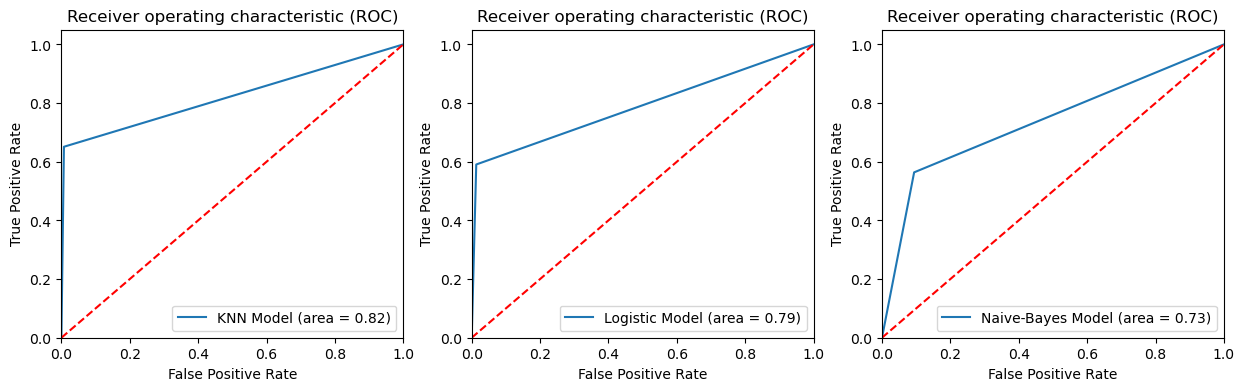

In [95]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_accuracy * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Possitive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Possive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Possitive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Possive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Possitive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Possive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])


print('\n\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.  If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_Expr_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_Expr_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()